## DECISION TREE CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Step 1: Load the CSV dataset

Data = pd.read_csv('DRUG.csv', usecols=['review','rating'])
Data.head()

,review,rating
0,"""i have used restasis for about a year now and...",2.0
1,"""my experience has been somewhat mixed. i have...",7.0
2,"""this is my second implanon would not recommen...",1.0
3,"""i recommend taking as prescribed, and the bot...",10.0
4,"""i have been on ampyra for 5 days and have bee...",9.0


In [3]:
Data.tail()

,review,rating
110806,"""i had tried many medications to level out my ...",8.0
110807,"""had partial thyroid removal with benign tumor...",7.0
110808,"""my experience with risperdal started when i f...",8.0
110809,"""my elderly dad was prescribed a low dose of a...",1.0
110810,"""latuda has been a hero in my battle against s...",10.0


In [4]:
Data['rating'].value_counts()

10.0    34255
9.0     19407
1.0     14286
8.0     13305
7.0      6671
5.0      5711
2.0      4776
3.0      4540
6.0      4359
4.0      3501
Name: rating, dtype: int64

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [6]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [7]:
# Step 2: Data Preprocessing

Data['review'] = Data['review'].apply(preprocess_text)

In [8]:
# Step 3: Feature Extraction (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
x1 = tfidf_vectorizer.fit_transform(Data['review'])

In [9]:
# Assuming you have a column named 'label' containing the target labels

y1 = Data['rating']

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)

print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({10.0: 34255, 9.0: 19407, 1.0: 14286, 8.0: 13305, 7.0: 6671, 5.0: 5711, 2.0: 4776, 3.0: 4540, 6.0: 4359, 4.0: 3501})
OVER SAMPLING DATA COUNT  :  Counter({2.0: 34255, 7.0: 34255, 1.0: 34255, 10.0: 34255, 9.0: 34255, 8.0: 34255, 5.0: 34255, 3.0: 34255, 6.0: 34255, 4.0: 34255})


In [11]:
# Step 5: Splitting Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier 

In [13]:
# Step 6: Machine Learning Model (Naive Bayes)

DTC = DecisionTreeClassifier()

In [14]:
# Step 7: Training the Model

DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
# Step 8: Evaluation
predicted = BC.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_test,predicted)

print("THE ACCURACY SCORE OF DECISION TREE CLASSIFIER  IS :",AC*100)

THE ACCURACY SCORE OF BAGGING CLASSIFIER  IS : 93.2024521967596


In [17]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_test,predicted)

print("THE HAMMING LOSS OF DECISION TREE CLASSIFIER IS :",HL*100)

THE HAMMING LOSS OF BAGGING CLASSIFIER IS : 6.797547803240403


In [18]:
from sklearn.metrics import classification_report

CL = classification_report(y_test,predicted)

print('THE CLASSIFICATION REPORT OF DECISION TREE CLASSIFIER:\n\n',CL)

THE CLASSIFICATION REPORT OF BAGGING CLASSIFIER:

               precision    recall  f1-score   support

         1.0       0.91      0.93      0.92      6939
         2.0       0.97      1.00      0.98      6881
         3.0       0.97      1.00      0.98      6946
         4.0       0.98      1.00      0.99      6752
         5.0       0.96      1.00      0.98      6872
         6.0       0.97      1.00      0.98      6778
         7.0       0.95      0.99      0.97      6863
         8.0       0.89      0.93      0.91      6778
         9.0       0.86      0.84      0.85      6869
        10.0       0.85      0.63      0.72      6832

    accuracy                           0.93     68510
   macro avg       0.93      0.93      0.93     68510
weighted avg       0.93      0.93      0.93     68510



In [19]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test,predicted)

print('THE CONFUSION MATRIX SCORE OF DECISION TREE CLASSIFIER:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:


 [[6463   52   52   22   46   23   33   69   64  115]
 [   3 6874    0    0    0    0    0    0    4    0]
 [   0    0 6945    0    0    0    0    0    0    1]
 [   0    0    0 6749    0    0    0    0    0    3]
 [   4    2    5    2 6856    0    0    2    1    0]
 [   2    0    0    0    0 6772    0    0    0    4]
 [   5    3    6    0    4    1 6819    2    7   16]
 [  53   20   22   20   24   30   45 6312   99  153]
 [ 121   38   44   38   60   47   82  180 5785  474]
 [ 415  129  100   89  151  141  236  521  772 4278]]


THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:


[[6463   52   52   22   46   23   33   69   64  115]
 [   3 6874    0    0    0    0    0    0    4    0]
 [   0    0 6945    0    0    0    0    0    0    1]
 [   0    0    0 6749    0    0    0    0    0    3]
 [   4    2    5    2 6856    0    0    2    1    0]
 [   2    0    0    0    0 6772    0    0    0    4]
 [   5    3    6    0    4    1 6819    2    7   16]
 [  53   20   22   20   24   30   45 6312   99  153]
 [ 121   38   44   38   60   47   82  180 5785  474]
 [ 415  129  100   89  151  141  236  521  772 4278]]


DISPLAY CONFUSION MATRIX OF BAGGING CLASSIFIER: 




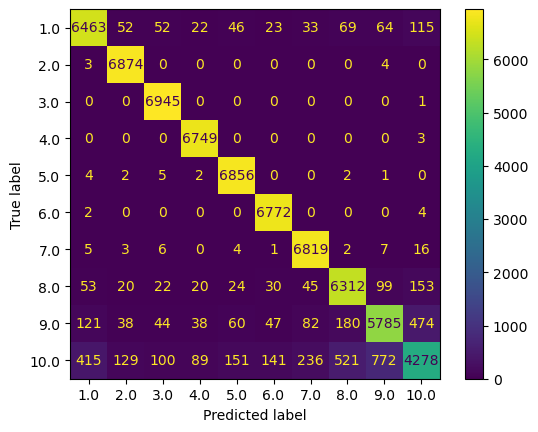

In [20]:
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF DECISION TREE CLASSIFIER:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX OF DECISION TREE CLASSIFIER: \n\n")

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DTC.classes_)
disp.plot()
plt.show()


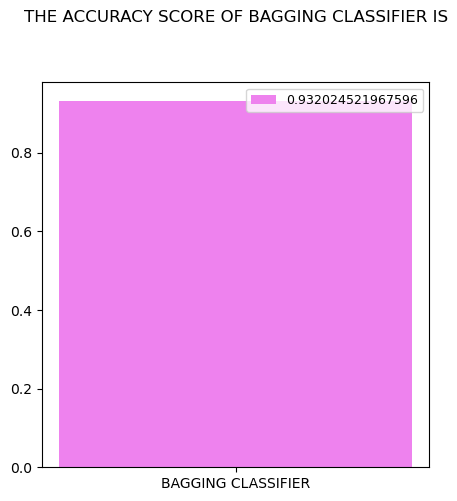

In [21]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="DECISION TREE CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("VIOLET"))
    plt.title("THE ACCURACY SCORE OF DECISION TREE CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()